# Contents : Review WordCloud(스코어별)
## (1) 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import datetime as dt
import os
import re
import warnings
warnings.filterwarnings('ignore')

## (2) 폰트불러오기

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

## (3) 환경세팅 - 설치

In [3]:
# !pip install KoNLPy

In [4]:
# !pip install soynlp

In [5]:
# !pip show soynlp

### Konlpy
    morphs() -- 학습되어있는 형태소 단위로 토큰화, 품사 태깅 x
    pos() -- 학습되어있는 형태소 단위로 토큰화, 품사 태깅 o
    nouns() -- 학습되어있는 명사 단위로 토큰화
    sentences() -- 문장 단위 토큰화 --*kkma.sentences()만 됨
### Soynlp
    띄워쓰기 기반 토큰화
    RegexTokenizer() -- 문장에서 규칙성이 보이는 부분만 우선 추출
    MaxScoreTokenizer() -- 토큰화를 원하는 단어에 대해 점수를 부여해서 우선 추출
### konlpy vs. Soynlp
    Konlpy -- 띄워쓰기가 없어도 토큰화 가능하나 고유 명사 추출 어려움
    soynlp -- 띄워쓰기 제대로 안되어 있으면 토큰화 되지 않으나 고유 명사 추출 가능
    고유 명사를 추출하기 위한 Soynlp
    띄어쓰기와 무관한 토큰화 Konlpy
- 참고 : https://github.com/chiheon/Korean-NLP


In [6]:
# import 
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

## (4) 데이터 불러오기

In [7]:
path = glob.glob('*.*') 
path

['1.RFM_Analysis.ipynb',
 '2-1.Review_Translate.ipynb',
 '2-2.Review_WordCloud.ipynb',
 '2-3.Review_WordCloud_Auto.ipynb',
 'Review01_translations.csv',
 'Review01_translations1.csv',
 'Review02_translations.csv',
 'Review02_translations1.csv',
 'Review03_translations.csv',
 'Review03_translations1.csv',
 'Review04_translations.csv',
 'Review04_translations1.csv',
 'Review05_translations.csv',
 'Review05_translations1.csv']

In [8]:
corpus = DoublespaceLineCorpus('Review01_translations.csv')
len(corpus)

3223

In [9]:
word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.141 Gb


In [10]:
corpus = DoublespaceLineCorpus('Review01_translations.csv', iter_sent = True)
len(corpus)

3183

In [11]:
i = 0 
for d in corpus:
    print(i,d)
    i += 1
    if i > 4:
        break

0 0
1 "이 제품은 사진의 Q 쇼와 다르고, 사치스럽지 않으며, 그대로 패딩되지 않았습니다."
2 제품이 작동하지 않고 잘못되었습니다.
3 내 주문은 전달되지 않았지만 이미 전자 메일이 배달되었다는 이메일을 받았으며 주문을 원합니다.
4 나는 이번에는 그들이 나에게주지 않았다는 사실 만 배달에 문제가 없었습니다.


## (5) RegexTokenizer 사용하기

In [12]:
df1 = pd.read_csv('Review01_translations.csv')
df2 = pd.read_csv('Review02_translations.csv')
df3 = pd.read_csv('Review03_translations.csv')
df4 = pd.read_csv('Review04_translations.csv')
df5 = pd.read_csv('Review05_translations.csv')

In [13]:
p1 = r'.*(배송|실망|불만족|다시|지불|제품).*'
pro1 = df1[df1['0'].str.match(p1)]
pro1.shape


(1593, 1)

In [14]:
pro1.head()

,0
0,"이 제품은 사진의 Q 쇼와 다르고, 사치스럽지 않으며, 그대로 패딩되지 않았습니다."
1,제품이 작동하지 않고 잘못되었습니다.
4,07/12에 제품을 구입하여 07/30에 배송 예측을 구입했습니다.지금까지 성적은 ...
5,나는 당신에게 연락을 시도하고 있지만 사이트를 통해주는 것은 아닙니다.석탄이 나오고...
6,회사는 내 제품을 제공하지 않았습니다.그는 20 일 동안 판매 할 수있는 부품이 없...


In [15]:
sample_index = 10
sample_content = df1['0'][sample_index]
sample_content

'나는 두 장을 사서 설명이나 의사 소통없이 단 하나의 상자를 받았다.더 나쁜 스타크를 만드는 것은 이러한 사례를 해결하기 위해 통신 채널 P를 제공하지 않습니다.단지 평가 또는 이메일.:('

In [16]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [17]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content

['나는',
 '두',
 '장을',
 '사서',
 '설명이나',
 '의사',
 '소통없이',
 '단',
 '하나의',
 '상자를',
 '받았다',
 '.',
 '더',
 '나쁜',
 '스타크를',
 '만드는',
 '것은',
 '이러한',
 '사례를',
 '해결하기',
 '위해',
 '통신',
 '채널',
 'P',
 '를',
 '제공하지',
 '않습니다',
 '.',
 '단지',
 '평가',
 '또는',
 '이메일',
 '.:(']

In [18]:
## 개행문자제거
##(출처: 오늘코드 | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
    text = re.sub('\\\\n',' ',text)
    return text


In [19]:
%time
sentences01 = df1['0'].apply(preprocess)

Wall time: 0 ns


In [20]:
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


0       [이, 제품은, 사진의, Q, 쇼와, 다르고, ,, 사치스럽지, 않으며, ,, 그대...
1                             [제품이, 작동하지, 않고, 잘못되었습니다, .]
2       [내, 주문은, 전달되지, 않았지만, 이미, 전자, 메일이, 배달되었다는, 이메일을...
3       [나는, 이번에는, 그들이, 나에게주지, 않았다는, 사실, 만, 배달에, 문제가, ...
4       [07, /, 12, 에, 제품을, 구입하여, 07, /, 30, 에, 배송, 예측...
                              ...                        
2749    [처음으로, 인터넷을, 주문하고, 37, 일, 후에는, 아직, 제품을받지, 못했습니...
2750                             [나는, 내, 제품을받지, 못했습니다, .]
2751    [나는, 펜던트의, 3, 개, 단위를, 샀는데, 지금까지, 1, 번만, 나왔는데, ...
2752    [나는, 2, x, 2.5, 깔개를, 구입하여, 2, x, 1.5, 에서, 하나를,...
2753    [나는, 2, 개의, 오메가, 3, 키트를, 얻고, 4, 를, 샀다, ., 같은, ...
Name: 0, Length: 2754, dtype: object

## (6)워드클라우드 생성하기

In [21]:
from wordcloud import WordCloud

### - 불용어

In [22]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [23]:
fontpath = "C:\Windows\Fonts\malgun.ttf"

In [24]:
stopwords_kr =  ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을',
 '제품이', '제품은', '개의', '다른', '지금까지', '않았습니다', 'E_R_R_O_R'
 '않습니다']

### Score1

Wall time: 0 ns


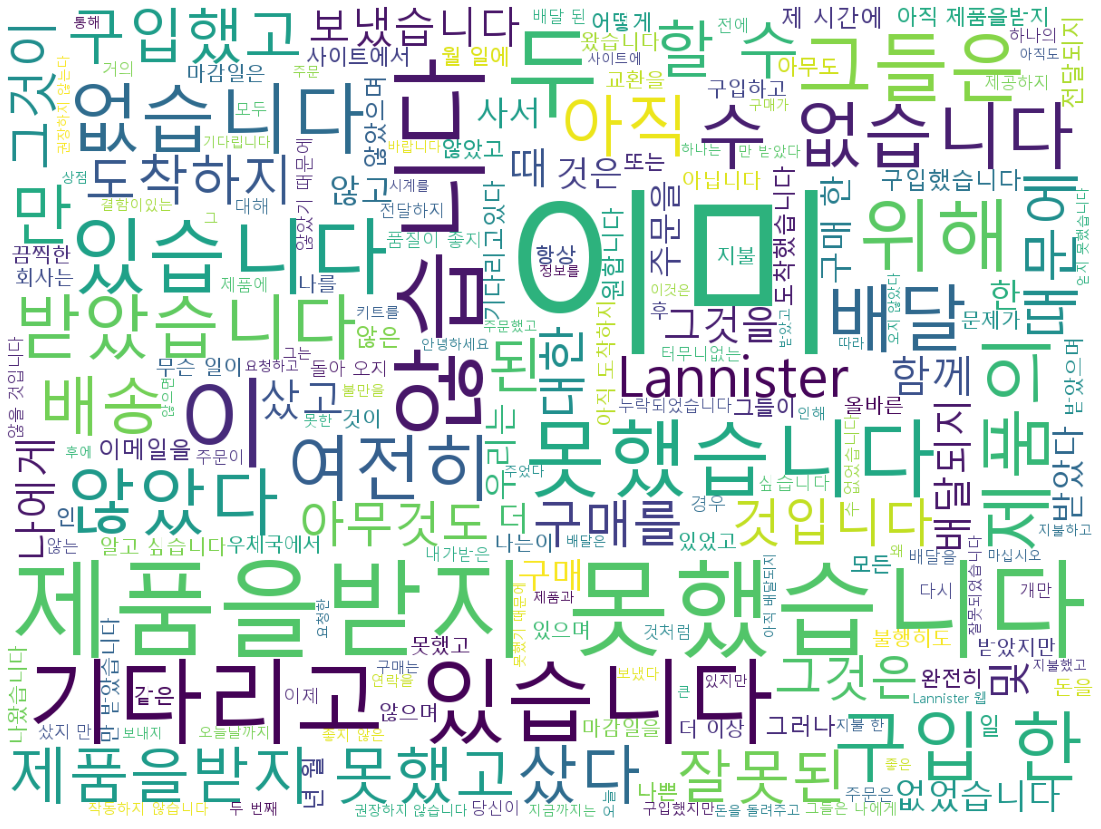

In [25]:
%time
displayWordCloud(' '.join(sentences01))

### Score2

In [47]:
%time
sentences02 = df2['0'].apply(preprocess)

Wall time: 0 ns


In [48]:
%time
tokens2 = sentences02.apply(tokenizer.tokenize)
tokens2[:]

Wall time: 0 ns


0      [나는, 팔없이, 팔을, 샀다, ., 이유, ., 테이블, 아래에, 맞습니다, .,...
1      [나는, 우체국에서, 주문을, 찾아야했다, ., 그들은, 다른, 배송, 시스템이, ...
2      [지체에서, 나는, 이미, 매장을, 추천하지, 않는다, ., 이미, 내가, 사서, ...
3      [나는, 거의, 한, 달, 전에, 구매를했고, 승자는, 배달, 시간, 동안, 일주일...
4                            [매우, 나쁜, 품질, ., 적합하지, 마십시오]
                             ...                        
664                    [그리고, 나는, 여전히, 포장으로, 우편으로, 보냈습니다]
665                                                [BOM]
666                                   [매우, 긴, 배달, 시간, .]
667                         [나는, 2, 를, 샀지, 만, 1, 만, 받았다]
668    [나는, 매장을, 추천하지만, 항상, 개선해야, 할, 사항이, 있으며, ,, 3, ...
Name: 0, Length: 669, dtype: object

In [49]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [50]:
fontpath = "C:\Windows\Fonts\malgun.ttf"

In [51]:
stopwords_kr =  ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을',
 '제품이', '제품은', '개의', '다른', '지금까지', '않았습니다', 'E_R_R_O_R'
 '않습니다']

Wall time: 0 ns


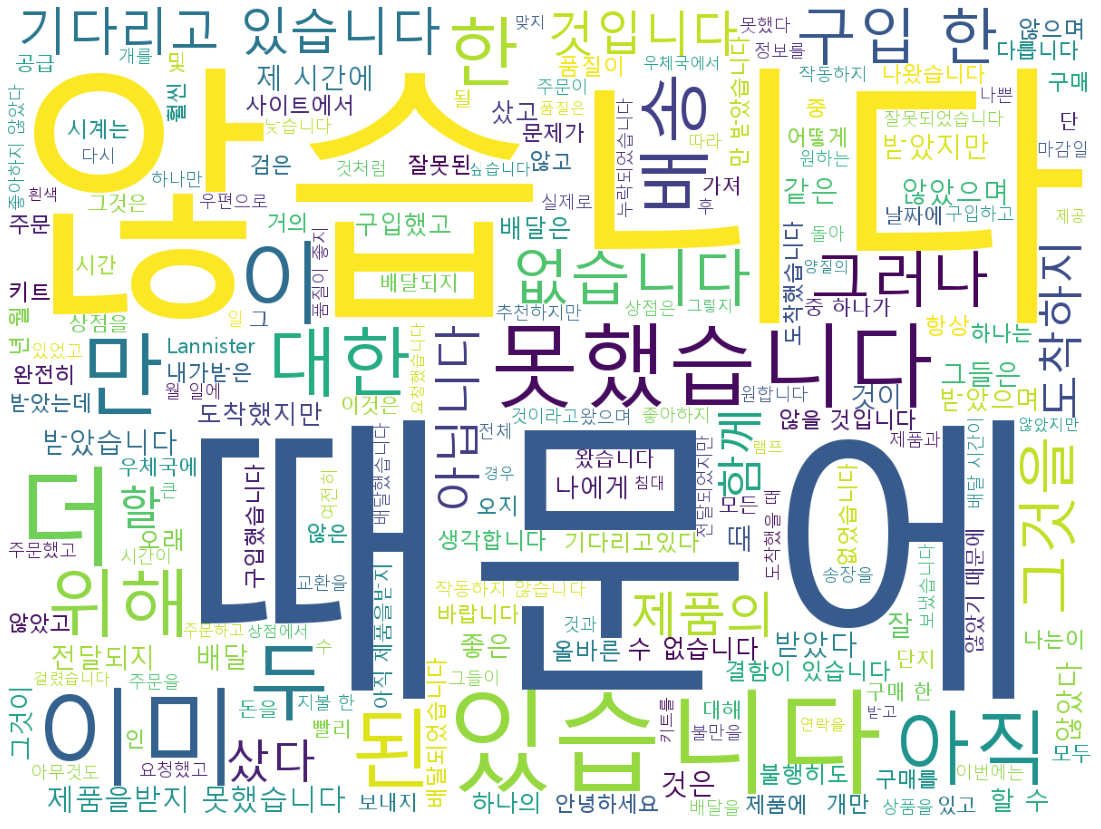

In [52]:
%time
displayWordCloud(' '.join(sentences02))

### Score3

In [41]:
%time
sentences03 = df3['0'].apply(preprocess)

Wall time: 0 ns


In [42]:
%time
tokens3 = sentences03.apply(tokenizer.tokenize)
tokens3[:]

Wall time: 0 ns


0       [마감일, 이전에, 도착했을, 때, ,, 재료는, 마감, 문제에서, 품질이, 좋지,...
1           [이, 사이트에서, 상품은, 함께, 모여졌지만, 이것은, 오지, 않았습니다, .]
2                                             [모두에게, OBG]
3       [제, 생각에는, 우체국의, 분배, 지점에서, 상품을, 제거해야하기, 때문에, 배송...
4                   [제품을받지, 못했고, 수익, 전에, 요청시, 취소되었습니다, .]
                              ...                        
1095                 [두, 개의, 제품이, 구입되었고, 하나만, 배달되었습니다, .]
1096    [나는, 때때로, Neubprodito, 에, 대한, 정보를, 알기, 위해, 중앙과...
1097    [오늘날까지, 나는, 제품을받지, 못했기, 때문에, 지금은이, 상점을, 추천, 할,...
1098    [Stark, 에, 연락하려고, 할, 때, 잘못된, 제품을, 받았습니다, ., Su...
1099                                         [매우, 비싼, 배송]
Name: 0, Length: 1100, dtype: object

In [43]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [44]:
fontpath = "C:\Windows\Fonts\malgun.ttf"

In [45]:
stopwords_kr =  ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을',
 '제품이', '제품은', '개의', '다른', '지금까지', '않았습니다', 'E_R_R_O_R'
 '않습니다']

Wall time: 0 ns


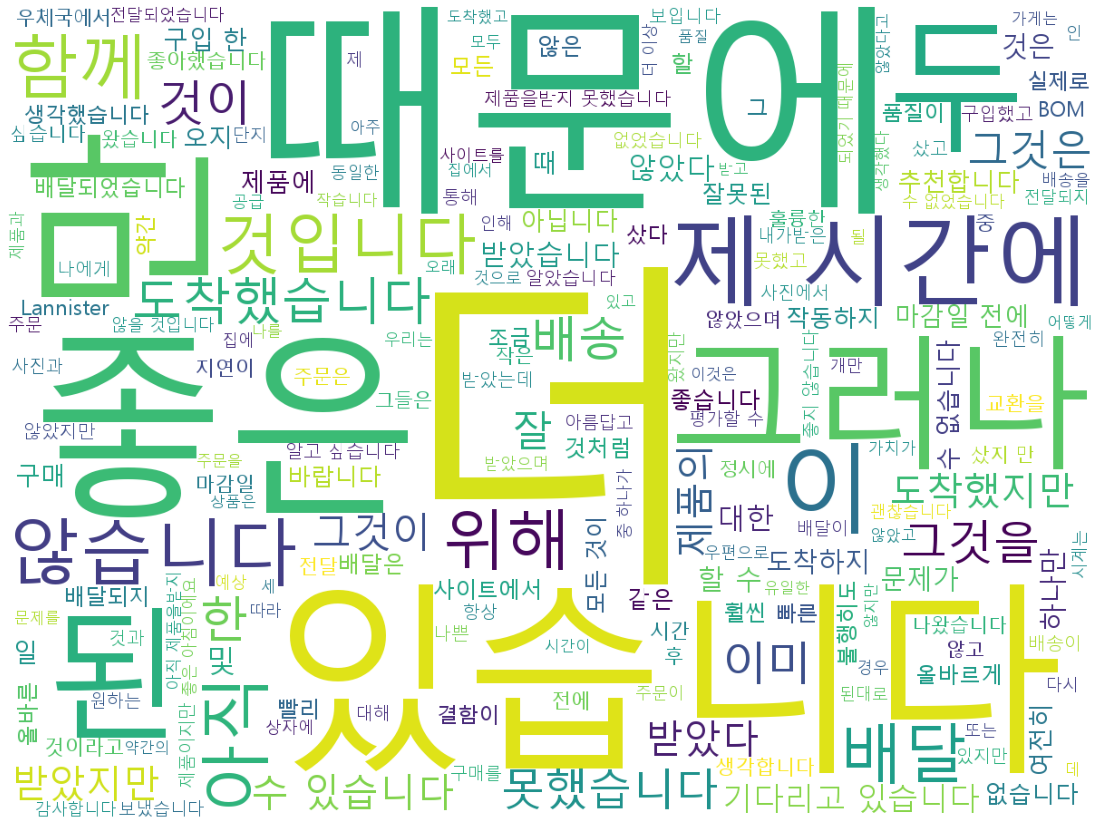

In [46]:
%time
displayWordCloud(' '.join(sentences03))

### Score4

In [54]:
%time
sentences04 = df4['0'].apply(preprocess)

Wall time: 0 ns


In [55]:
%time
tokens4 = sentences04.apply(tokenizer.tokenize)
tokens4[:]

Wall time: 0 ns


0                                             [좋은, 제품, .]
1                          [제, 시간에, 도착했습니다, ., 좋은, 제품, .]
2       [재료는, 더, 저항력이, 있어야합니다, ., 나는, 작은, 깨지기, 쉬운, 것을,...
3                                                [엄청난, .]
4       [나는, Lannis, ter, Stores, 에서, 샀지, 만, 자유, 시장, 패...
                              ...                        
1805                         [배송, 예정일, 전에, 제품을, 받았습니다, .]
1806    [카트는, 매우, 좋습니다, ., 더, 나을, 수, 있습니다, ., 막대, 사이의,...
1807                                    [아주, 좋은, 사이트, 추천]
1808    [매우, 아름답고, 정교한, ,, 나는, 아직, 설치하지, 않았지만, 그것을, 좋아...
1809                                             [매우, 좋은]
Name: 0, Length: 1810, dtype: object

In [56]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [57]:
fontpath = "C:\Windows\Fonts\malgun.ttf"

In [58]:
stopwords_kr =  ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을',
 '제품이', '제품은', '개의', '다른', '지금까지', '않았습니다', 'E_R_R_O_R'
 '않습니다']

Wall time: 0 ns


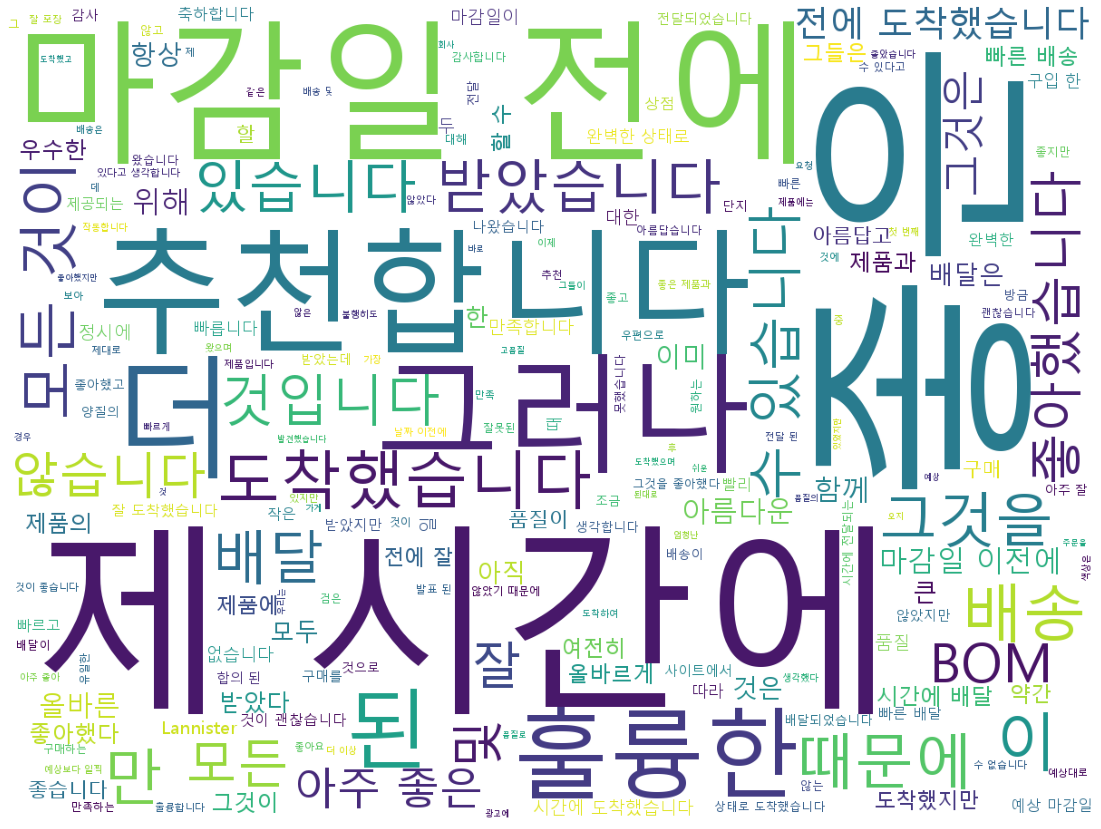

In [59]:
%time
displayWordCloud(' '.join(sentences04))

### Score5

In [60]:
%time
sentences05 = df5['0'].apply(preprocess)

Wall time: 0 ns


In [61]:
%time
tokens5 = sentences05.apply(tokenizer.tokenize)
tokens5[:]

Wall time: 0 ns


0                                               [모든, 시간에]
1       [나는, 이미, Lannis, ter, Stores, 에서, 많은, 제품을, 구입했...
2                [비, 호환성으로, 인해, 돌아올, 것입니다, ., 훌륭한, 제품, !]
3        [내가, 사전, -, 그들이하는, 일에, 많은, 진지한, 사람들이, 있습니다, ...]
4             [나는, 마감일, 전에, 그것을, 받았다, !!!, 잘, 포장되었습니다, !]
                              ...                        
6189                                             [좋은, 거래]
6190              [매우, 좋은, !, 제, 시간에, 도착했습니다, !, 사랑했던, !]
6191                              [예상, 마감일, 전에, 받았습니다, .]
6192                       [나는, 그것이, 잘, 작동하는, 것을, 좋아했습니다]
6193                         [예정된, 마감일, 전에, 잘, 도착했습니다, .]
Name: 0, Length: 6194, dtype: object

In [62]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [63]:
fontpath = "C:\Windows\Fonts\malgun.ttf"

In [64]:
stopwords_kr =  ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을',
 '제품이', '제품은', '개의', '다른', '지금까지', '않았습니다', 'E_R_R_O_R'
 '않습니다']

Wall time: 0 ns


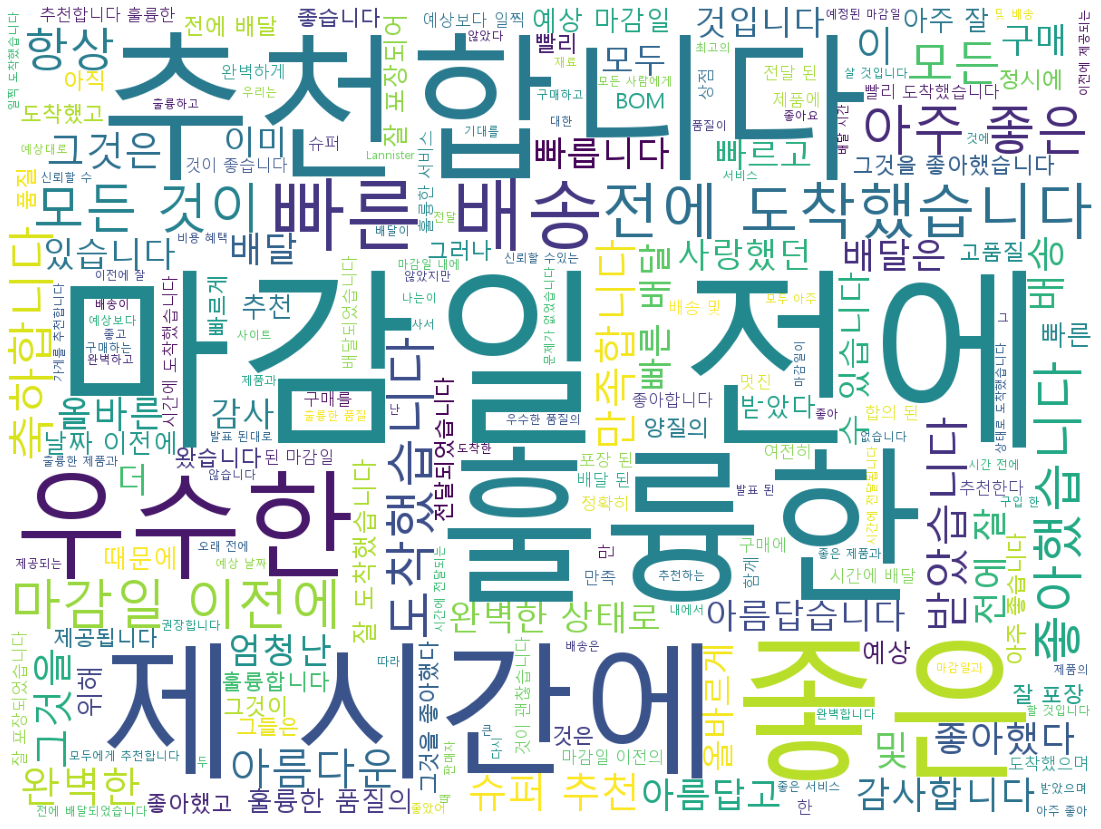

In [65]:
%time
displayWordCloud(' '.join(sentences05))